# Importing Libraries 

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [204]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 5000)

In [205]:
# loading dataset
df = pd.read_csv(r"C:\Users\mandar joshi\OneDrive\Desktop\word files\Project\Yourcab\YourCabs.csv")
df.head(50)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,NaN,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,NaN,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,NaN,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,NaN,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,NaN,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
5,132518,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,01-01-2013 22:30,NaN,0,0,01-01-2013 08:01,13.028530,77.546250,12.869805,77.653211,0
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,01-01-2013,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
7,132520,22181,12,NaN,2,1192.0,832.0,NaN,NaN,01-01-2013 11:00,NaN,0,0,01-01-2013 09:39,12.976770,77.572700,12.880190,77.645580,0
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,NaN,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
9,132522,22184,12,NaN,2,516.0,376.0,NaN,NaN,01-01-2013 11:00,NaN,0,0,01-01-2013 09:49,13.005600,77.657990,12.902450,77.660810,0


In [206]:
# checking the shape of dataset... 
df.shape

(43431, 19)

In [207]:
# printing the column names
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  object 
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

In [209]:
# create copy of orignal data set so that we do changes in that
df_1 = df.copy()

In [210]:
missing_val= (df_1.isna().sum() / len(df_1)) * 100
missing_val

id                      0.000000
user_id                 0.000000
vehicle_model_id        0.000000
package_id             82.616104
travel_type_id          0.000000
from_area_id            0.202620
to_area_id             21.040271
from_city_id           62.365591
to_city_id             96.343626
from_date               0.000000
to_date                41.191775
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.214133
from_long               0.214133
to_lat                 21.040271
to_long                21.040271
Car_Cancellation        0.000000
dtype: float64

#as we can see that package_id has highest null values because this applicable for only traval type id 3 i.e hourly rental. 
#we droping to_date, id, user_id and vehicle mode id as of now.

In [211]:
df_1['vehicle_model_id'].value_counts(normalize=True)*100

#so as we can see 12 is covering for 73% of the entire column of vehicle_model_id

12    73.355437
85     5.542124
89     5.505284
65     4.402385
28     3.918860
24     3.439939
87     1.300914
90     0.718381
23     0.683843
86     0.283208
10     0.239460
64     0.195713
54     0.168083
17     0.092100
91     0.057563
30     0.032235
36     0.020723
13     0.016118
72     0.004605
1      0.004605
43     0.004605
14     0.002303
69     0.002303
76     0.002303
75     0.002303
70     0.002303
39     0.002303
Name: vehicle_model_id, dtype: float64

In [212]:
df_1 = df_1.drop(['id','user_id','vehicle_model_id','to_date'],axis=1)

In [213]:
# extration of day,month,time.. etc from datetime columns

In [214]:
import datetime as dt

In [215]:
df_1['from_date'] = pd.to_datetime(df_1['from_date'])
df_1['booking_created'] = pd.to_datetime(df_1['booking_created'])


In [216]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   package_id           7550 non-null   float64       
 1   travel_type_id       43431 non-null  int64         
 2   from_area_id         43343 non-null  float64       
 3   to_area_id           34293 non-null  float64       
 4   from_city_id         16345 non-null  float64       
 5   to_city_id           1588 non-null   float64       
 6   from_date            43431 non-null  datetime64[ns]
 7   online_booking       43431 non-null  int64         
 8   mobile_site_booking  43431 non-null  int64         
 9   booking_created      43431 non-null  datetime64[ns]
 10  from_lat             43338 non-null  float64       
 11  from_long            43338 non-null  float64       
 12  to_lat               34293 non-null  float64       
 13  to_long              34293 non-

In [217]:
# Extract date and time components from 'from_date'
df_1["From_Date_Day"] = df_1["from_date"].dt.day_name()
df_1["From_Date_Month_name"] = df_1["from_date"].dt.month_name()
df_1["From_Date_Month"] = df_1["from_date"].dt.month
df_1["From_Date_Hour"] = df_1["from_date"].dt.hour

# Extract date and time components from 'booking_created'
df_1["Booking_Created_Day"] = df_1["booking_created"].dt.day_name()
df_1["Booking_Created_Month_name"] = df_1["booking_created"].dt.month_name()
df_1["Booking_Created_Month"] = df_1["booking_created"].dt.month
df_1["Booking_Created_Hour"] = df_1["booking_created"].dt.hour

# Display the first few rows of the modified DataFrame
df_1.head()


,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month_name,From_Date_Month,From_Date_Hour,Booking_Created_Day,Booking_Created_Month_name,Booking_Created_Month,Booking_Created_Hour
0,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,Tuesday,January,1,2,Tuesday,January,1,1
1,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,Tuesday,January,1,9,Tuesday,January,1,2
2,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,Tuesday,January,1,3,Tuesday,January,1,3
3,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,Tuesday,January,1,5,Tuesday,January,1,4
4,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,Tuesday,January,1,9,Tuesday,January,1,7


In [218]:
def cal_season(x):
    if x in[10,11,12,1]:
        return "Winter"
    elif x in [2,3]:
        return "Spring"
    elif x in [4,5,6]:
        return "Summer"
    else:
        return "Monsoon"


In [219]:
def cal_timing(x):
    if x in range(1,4):
        return "Late Night"
    elif x in range(4,12):
        return "Morning"
    elif x in range(12,16):
        return "Afternoon"
    else:
        return "Evening"

In [220]:
df_1["from_day_Season"]=df_1["From_Date_Month"].apply(cal_season)
df_1["booking_Season"]=df_1["Booking_Created_Month"].apply(cal_season)


In [221]:
df_1["from_TOD"]=df_1["From_Date_Hour"].apply(cal_timing)
df_1["booking_TOD"]=df_1["Booking_Created_Hour"].apply(cal_timing)

In [222]:
df_1.head(50)

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month_name,From_Date_Month,From_Date_Hour,Booking_Created_Day,Booking_Created_Month_name,Booking_Created_Month,Booking_Created_Hour,from_day_Season,booking_Season,from_TOD,booking_TOD
0,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,Tuesday,January,1,2,Tuesday,January,1,1,Winter,Winter,Late Night,Late Night
1,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,Tuesday,January,1,9,Tuesday,January,1,2,Winter,Winter,Morning,Late Night
2,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,Tuesday,January,1,3,Tuesday,January,1,3,Winter,Winter,Late Night,Late Night
3,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,Tuesday,January,1,5,Tuesday,January,1,4,Winter,Winter,Morning,Morning
4,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,Tuesday,January,1,9,Tuesday,January,1,7,Winter,Winter,Morning,Morning
5,NaN,2,1021.0,1323.0,NaN,NaN,2013-01-01 22:30:00,0,0,2013-01-01 08:01:00,13.028530,77.546250,12.869805,77.653211,0,Tuesday,January,1,22,Tuesday,January,1,8,Winter,Winter,Evening,Morning
6,NaN,1,571.0,NaN,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,12.951850,77.696420,NaN,NaN,0,Tuesday,January,1,9,Tuesday,January,1,9,Winter,Winter,Morning,Morning
7,NaN,2,1192.0,832.0,NaN,NaN,2013-01-01 11:00:00,0,0,2013-01-01 09:39:00,12.976770,77.572700,12.880190,77.645580,0,Tuesday,January,1,11,Tuesday,January,1,9,Winter,Winter,Morning,Morning
8,2.0,3,448.0,NaN,NaN,NaN,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,12.927320,77.635750,NaN,NaN,0,Tuesday,January,1,16,Tuesday,January,1,9,Winter,Winter,Evening,Morning
9,NaN,2,516.0,376.0,NaN,NaN,2013-01-01 11:00:00,0,0,2013-01-01 09:49:00,13.005600,77.657990,12.902450,77.660810,0,Tuesday,January,1,11,Tuesday,January,1,9,Winter,Winter,Morning,Morning


In [223]:
df_1['From_Date_Month'].value_counts()

8     5445
7     4907
10    4814
9     4736
6     4392
5     4296
11    3171
4     3119
2     2890
1     2852
3     2790
12      19
Name: From_Date_Month, dtype: int64

In [ ]:
# Here We are calculting time diffrance

In [224]:
df_1['time_diff'] = (pd.to_datetime(df_1['from_date']) - pd.to_datetime(df_1['booking_created'])).astype('timedelta64[m]')

In [226]:
df_1[df_1['time_diff'] < 0].head(2)

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month_name,From_Date_Month,From_Date_Hour,Booking_Created_Day,Booking_Created_Month_name,Booking_Created_Month,Booking_Created_Hour,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
1763,1.0,3,1298.0,NaN,NaN,NaN,2013-01-20 14:15:00,0,0,2013-01-20 15:01:00,12.879678,77.646355,NaN,NaN,0,Sunday,January,1,14,Sunday,January,1,15,Winter,Winter,Afternoon,Afternoon,-46.0
2990,2.0,3,393.0,NaN,NaN,NaN,2013-02-01 09:45:00,0,0,2013-02-01 13:18:00,13.199560,77.706880,NaN,NaN,0,Friday,February,2,9,Friday,February,2,13,Spring,Spring,Morning,Afternoon,-213.0


In [227]:
df2= df_1.drop(['from_date','booking_created'],axis=1)


In [228]:
df2.iloc[[42618]]

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month_name,From_Date_Month,From_Date_Hour,Booking_Created_Day,Booking_Created_Month_name,Booking_Created_Month,Booking_Created_Hour,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
42618,NaN,1,1304.0,NaN,15.0,32.0,0,0,12.97262,77.608832,NaN,NaN,0,Sunday,November,11,7,Sunday,November,11,8,Winter,Winter,Morning,Morning,-64.0


In [229]:
#df2.drop(['From_Date_Month','Booking_Created_Month'],axis=1,inplace=True)

In [230]:
df_2 = df2.drop(['From_Date_Month_name','Booking_Created_Month_name'],axis=1)
df_2.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month,From_Date_Hour,Booking_Created_Day,Booking_Created_Month,Booking_Created_Hour,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
0,NaN,2,83.0,448.0,NaN,NaN,0,0,12.924150,77.672290,12.927320,77.635750,0,Tuesday,1,2,Tuesday,1,1,Winter,Winter,Late Night,Late Night,21.0
1,NaN,2,1010.0,540.0,NaN,NaN,0,0,12.966910,77.749350,12.927680,77.626640,0,Tuesday,1,9,Tuesday,1,2,Winter,Winter,Morning,Late Night,395.0
2,NaN,2,1301.0,1034.0,NaN,NaN,0,0,12.937222,77.626915,13.047926,77.597766,0,Tuesday,1,3,Tuesday,1,3,Winter,Winter,Late Night,Late Night,22.0
3,NaN,2,768.0,398.0,NaN,NaN,0,0,12.989990,77.553320,12.971430,77.639140,0,Tuesday,1,5,Tuesday,1,4,Winter,Winter,Morning,Morning,66.0
4,NaN,2,1365.0,849.0,NaN,NaN,0,0,12.845653,77.677925,12.954340,77.600720,0,Tuesday,1,9,Tuesday,1,7,Winter,Winter,Morning,Morning,67.0


In [231]:
df_2.iloc[[6106]]

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month,From_Date_Hour,Booking_Created_Day,Booking_Created_Month,Booking_Created_Hour,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
6106,1.0,3,1010.0,NaN,NaN,NaN,0,0,12.96691,77.74935,NaN,NaN,0,Monday,3,0,Monday,3,2,Spring,Spring,Evening,Late Night,-90.0


In [232]:
df_2= df_2.drop(['From_Date_Hour','Booking_Created_Hour'],axis=1)

In [233]:
df_2.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month,Booking_Created_Day,Booking_Created_Month,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
0,NaN,2,83.0,448.0,NaN,NaN,0,0,12.924150,77.672290,12.927320,77.635750,0,Tuesday,1,Tuesday,1,Winter,Winter,Late Night,Late Night,21.0
1,NaN,2,1010.0,540.0,NaN,NaN,0,0,12.966910,77.749350,12.927680,77.626640,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Late Night,395.0
2,NaN,2,1301.0,1034.0,NaN,NaN,0,0,12.937222,77.626915,13.047926,77.597766,0,Tuesday,1,Tuesday,1,Winter,Winter,Late Night,Late Night,22.0
3,NaN,2,768.0,398.0,NaN,NaN,0,0,12.989990,77.553320,12.971430,77.639140,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,66.0
4,NaN,2,1365.0,849.0,NaN,NaN,0,0,12.845653,77.677925,12.954340,77.600720,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,67.0


In [234]:
df_2.shape

(43431, 22)

# Creating DataSets on the basis of trvel type Id 

In [235]:
# travel Type ID 1

In [236]:
id_1 = df_2.loc[df_2['travel_type_id']== 1]

In [237]:
id_1.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month,Booking_Created_Day,Booking_Created_Month,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
6,NaN,1,571.0,NaN,15.0,108.0,0,0,12.951850,77.696420,NaN,NaN,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,24.0
17,NaN,1,1383.0,NaN,NaN,32.0,1,0,12.930451,77.685822,NaN,NaN,0,Saturday,1,Tuesday,1,Winter,Winter,Morning,Afternoon,15583.0
24,NaN,1,515.0,NaN,15.0,32.0,0,0,12.978960,77.673450,NaN,NaN,0,Saturday,1,Tuesday,1,Winter,Winter,Morning,Afternoon,5390.0
158,NaN,1,136.0,NaN,1.0,152.0,1,0,12.907960,77.624180,NaN,NaN,0,Friday,1,Thursday,1,Winter,Winter,Morning,Afternoon,1271.0
216,NaN,1,1118.0,NaN,NaN,32.0,1,0,12.930220,77.560390,NaN,NaN,0,Sunday,1,Friday,1,Winter,Winter,Morning,Morning,2758.0


In [238]:
id_1.shape

(1589, 22)

In [239]:
# travel Type ID 2

In [240]:
id_2 = df_2.loc[df_2['travel_type_id']== 2]

In [241]:
id_2.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month,Booking_Created_Day,Booking_Created_Month,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
0,NaN,2,83.0,448.0,NaN,NaN,0,0,12.924150,77.672290,12.927320,77.635750,0,Tuesday,1,Tuesday,1,Winter,Winter,Late Night,Late Night,21.0
1,NaN,2,1010.0,540.0,NaN,NaN,0,0,12.966910,77.749350,12.927680,77.626640,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Late Night,395.0
2,NaN,2,1301.0,1034.0,NaN,NaN,0,0,12.937222,77.626915,13.047926,77.597766,0,Tuesday,1,Tuesday,1,Winter,Winter,Late Night,Late Night,22.0
3,NaN,2,768.0,398.0,NaN,NaN,0,0,12.989990,77.553320,12.971430,77.639140,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,66.0
4,NaN,2,1365.0,849.0,NaN,NaN,0,0,12.845653,77.677925,12.954340,77.600720,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,67.0


In [242]:
id_2.shape

(34292, 22)

In [243]:
# travel Type ID 3

In [244]:
id_3 = df_2.loc[df_2['travel_type_id']== 3]

In [245]:
id_3.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month,Booking_Created_Day,Booking_Created_Month,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
8,2.0,3,448.0,NaN,NaN,NaN,0,0,12.927320,77.635750,NaN,NaN,0,Tuesday,1,Tuesday,1,Winter,Winter,Evening,Morning,376.0
20,2.0,3,471.0,NaN,NaN,NaN,0,0,13.018540,77.635240,NaN,NaN,0,Tuesday,1,Tuesday,1,Winter,Winter,Afternoon,Afternoon,98.0
23,1.0,3,1286.0,NaN,NaN,NaN,0,0,12.973448,77.620320,NaN,NaN,0,Tuesday,1,Tuesday,1,Winter,Winter,Evening,Afternoon,111.0
34,1.0,3,1323.0,NaN,NaN,NaN,1,0,12.869805,77.653211,NaN,NaN,0,Tuesday,1,Tuesday,1,Winter,Winter,Evening,Evening,155.0
47,2.0,3,142.0,NaN,NaN,NaN,0,0,12.912810,77.609230,NaN,NaN,0,Wednesday,1,Tuesday,1,Winter,Winter,Late Night,Evening,443.0


In [246]:
id_3.shape

(7550, 22)

# Creating Model For Travel Id 1

In [247]:
id_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   package_id             0 non-null      float64
 1   travel_type_id         1589 non-null   int64  
 2   from_area_id           1501 non-null   float64
 3   to_area_id             1 non-null      float64
 4   from_city_id           1393 non-null   float64
 5   to_city_id             1588 non-null   float64
 6   online_booking         1589 non-null   int64  
 7   mobile_site_booking    1589 non-null   int64  
 8   from_lat               1496 non-null   float64
 9   from_long              1496 non-null   float64
 10  to_lat                 1 non-null      float64
 11  to_long                1 non-null      float64
 12  Car_Cancellation       1589 non-null   int64  
 13  From_Date_Day          1589 non-null   object 
 14  From_Date_Month        1589 non-null   int64  
 15  Boo

In [248]:
(id_1.isna().sum()/ len(id_1))*100


package_id               100.000000
travel_type_id             0.000000
from_area_id               5.538074
to_area_id                99.937067
from_city_id              12.334802
to_city_id                 0.062933
online_booking             0.000000
mobile_site_booking        0.000000
from_lat                   5.852738
from_long                  5.852738
to_lat                    99.937067
to_long                   99.937067
Car_Cancellation           0.000000
From_Date_Day              0.000000
From_Date_Month            0.000000
Booking_Created_Day        0.000000
Booking_Created_Month      0.000000
from_day_Season            0.000000
booking_Season             0.000000
from_TOD                   0.000000
booking_TOD                0.000000
time_diff                  0.000000
dtype: float64

In [249]:
id_1.drop(['package_id','to_area_id','from_lat','from_long','to_lat','to_long','from_area_id'],axis=1, inplace = True)

In [250]:
id_1.value_counts('from_city_id')

from_city_id
15.0    1281
1.0      106
31.0       6
dtype: int64

In [251]:
id_1.value_counts('to_city_id')

to_city_id
32.0     475
55.0     174
29.0     116
146.0     89
108.0     64
41.0      27
58.0      26
131.0     26
44.0      26
147.0     26
49.0      25
24.0      25
13.0      21
152.0     20
64.0      20
113.0     19
56.0      17
161.0     15
160.0     14
51.0      14
31.0      13
45.0      12
69.0      12
191.0     12
65.0      11
125.0     11
4.0       11
37.0      10
61.0       9
116.0      9
110.0      9
121.0      8
89.0       8
190.0      8
82.0       7
126.0      7
109.0      6
132.0      6
178.0      6
12.0       6
30.0       6
14.0       5
192.0      5
144.0      5
148.0      5
17.0       5
62.0       5
198.0      5
184.0      5
66.0       5
189.0      4
203.0      4
75.0       4
185.0      4
151.0      4
168.0      4
57.0       4
154.0      3
10.0       3
115.0      3
114.0      3
36.0       3
85.0       3
77.0       3
68.0       3
170.0      2
173.0      2
162.0      2
11.0       2
48.0       2
42.0       2
149.0      2
28.0       2
164.0      2
176.0      2
5.0        2
7

In [252]:
id_1["from_city_id"].fillna(id_1["from_city_id"].mode()[0],inplace=True)

In [253]:
id_1["to_city_id"].fillna(id_1["to_city_id"].mode()[0],inplace=True)

In [254]:
(id_1.isna().sum()/ len(id_1))*100

travel_type_id           0.0
from_city_id             0.0
to_city_id               0.0
online_booking           0.0
mobile_site_booking      0.0
Car_Cancellation         0.0
From_Date_Day            0.0
From_Date_Month          0.0
Booking_Created_Day      0.0
Booking_Created_Month    0.0
from_day_Season          0.0
booking_Season           0.0
from_TOD                 0.0
booking_TOD              0.0
time_diff                0.0
dtype: float64

In [255]:
x1=id_1.drop('Car_Cancellation',axis=1)
y1=id_1['Car_Cancellation'] 

# Data Visualization

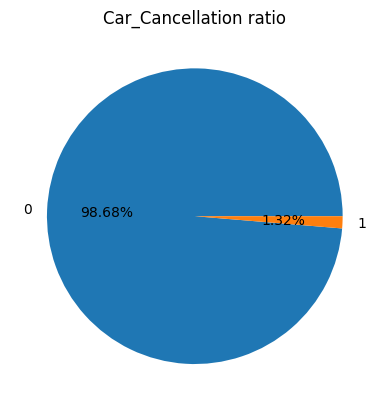

In [256]:
plt.pie(id_1["Car_Cancellation"].value_counts(normalize=True),labels=["0","1"],autopct="%1.2f%%")
plt.title("Car_Cancellation ratio")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

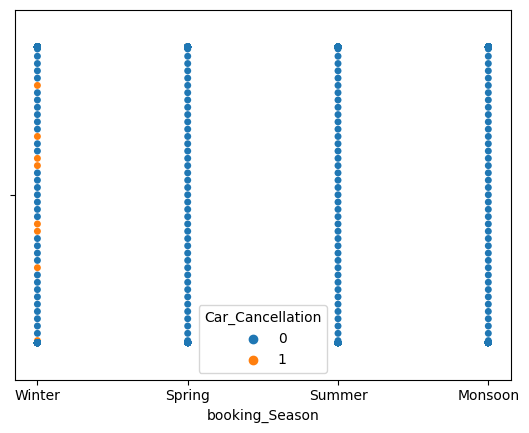

In [257]:
sns.swarmplot(x="booking_Season",data=id_1,hue="Car_Cancellation")
plt.show

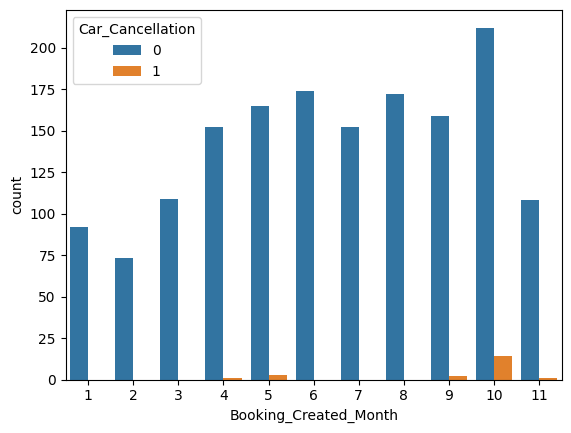

In [258]:
sns.countplot(x="Booking_Created_Month",data=id_1,hue="Car_Cancellation")
plt.show()

In [259]:
id_1.value_counts("Car_Cancellation")

Car_Cancellation
0    1568
1      21
dtype: int64

In [260]:
import pandas as pd

value_counts = id_1["Car_Cancellation"].value_counts()

percentage = value_counts / len(id_1) * 100

print(percentage)

0    98.678414
1     1.321586
Name: Car_Cancellation, dtype: float64


In [261]:
id_1.head()

,travel_type_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,From_Date_Day,From_Date_Month,Booking_Created_Day,Booking_Created_Month,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
6,1,15.0,108.0,0,0,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,24.0
17,1,15.0,32.0,1,0,0,Saturday,1,Tuesday,1,Winter,Winter,Morning,Afternoon,15583.0
24,1,15.0,32.0,0,0,0,Saturday,1,Tuesday,1,Winter,Winter,Morning,Afternoon,5390.0
158,1,1.0,152.0,1,0,0,Friday,1,Thursday,1,Winter,Winter,Morning,Afternoon,1271.0
216,1,15.0,32.0,1,0,0,Sunday,1,Friday,1,Winter,Winter,Morning,Morning,2758.0


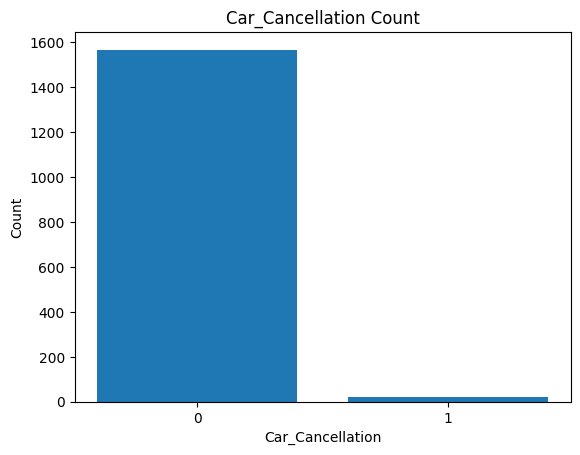

In [262]:
import matplotlib.pyplot as plt

value_counts = id_1["Car_Cancellation"].value_counts()

plt.bar(value_counts.index, value_counts.values)

plt.xlabel("Car_Cancellation")
plt.ylabel("Count")
plt.title("Car_Cancellation Count")

plt.xticks([0, 1])

plt.show()

In [263]:
# Seprating data into two part

In [264]:
num1 = x1.select_dtypes(include='number')
char1 = x1.select_dtypes(include='object')

In [265]:
num1.head()

,travel_type_id,from_city_id,to_city_id,online_booking,mobile_site_booking,From_Date_Month,Booking_Created_Month,time_diff
6,1,15.0,108.0,0,0,1,1,24.0
17,1,15.0,32.0,1,0,1,1,15583.0
24,1,15.0,32.0,0,0,1,1,5390.0
158,1,1.0,152.0,1,0,1,1,1271.0
216,1,15.0,32.0,1,0,1,1,2758.0


In [266]:
num1.value_counts("From_Date_Month")

From_Date_Month
10    214
6     182
8     174
5     173
9     160
7     145
4     142
11    129
3     109
1      87
2      71
12      3
dtype: int64

In [267]:
num1.value_counts("Booking_Created_Month")

Booking_Created_Month
10    226
6     174
8     172
5     168
9     161
4     153
7     152
3     109
11    109
1      92
2      73
dtype: int64

In [268]:
char1.head()

,From_Date_Day,Booking_Created_Day,from_day_Season,booking_Season,from_TOD,booking_TOD
6,Tuesday,Tuesday,Winter,Winter,Morning,Morning
17,Saturday,Tuesday,Winter,Winter,Morning,Afternoon
24,Saturday,Tuesday,Winter,Winter,Morning,Afternoon
158,Friday,Thursday,Winter,Winter,Morning,Afternoon
216,Sunday,Friday,Winter,Winter,Morning,Morning


# Checking Corelation Matrix

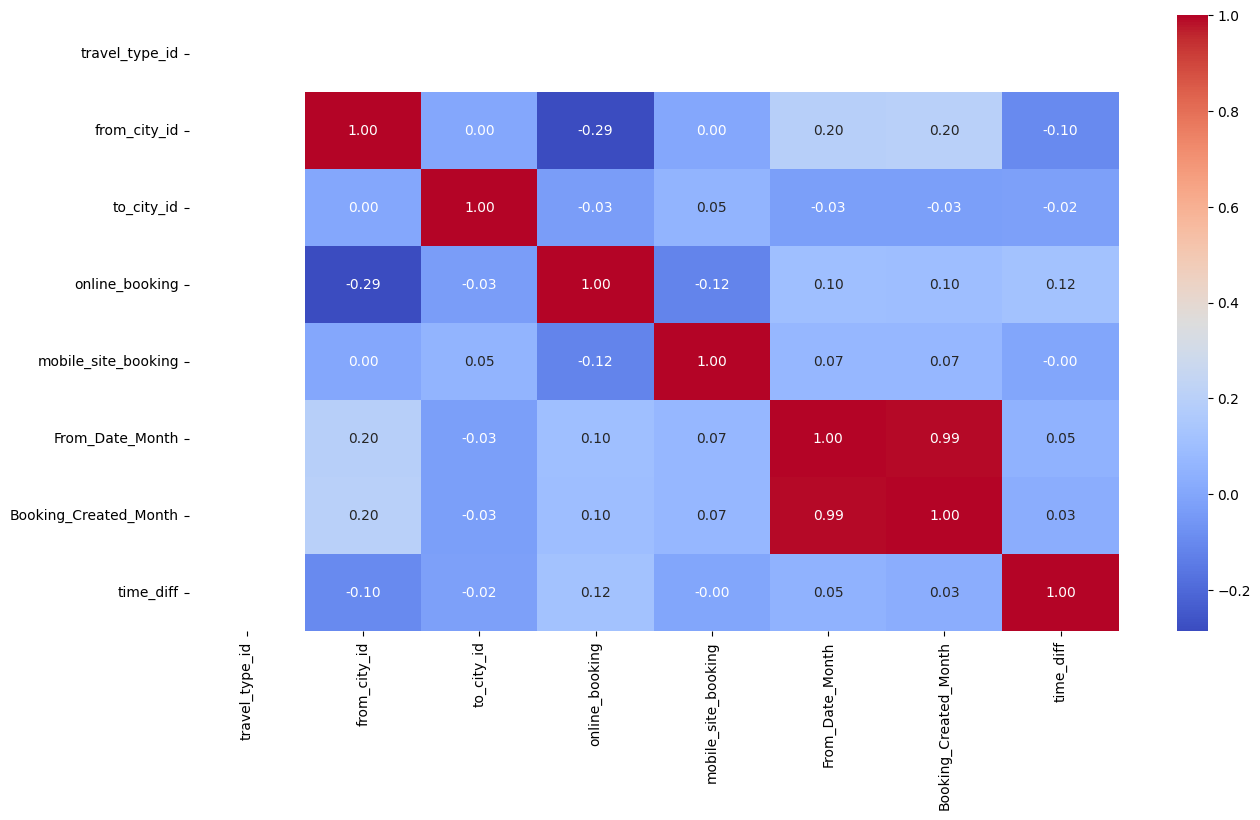

In [269]:
corr_matrix = num1.corr()

plt.figure(figsize=(15, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

In [270]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_columns = ['travel_type_id', 'from_city_id', 'to_city_id', 'online_booking',
                     'mobile_site_booking','From_Date_Month','Booking_Created_Month',
                     'time_diff']

X = num1[selected_columns]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Variable        VIF
0         travel_type_id  24.364906
1           from_city_id   1.165931
2             to_city_id   1.004562
3         online_booking   1.152530
4    mobile_site_booking   1.026777
5        From_Date_Month  63.527392
6  Booking_Created_Month  63.466503
7              time_diff   1.045405


In [271]:
num1.drop('From_Date_Month',axis = 1, inplace = True)

# Encoding Catagorical Veriable

In [272]:
x_char_dum1 = pd.get_dummies(char1, drop_first = True)

In [273]:
x_char_dum1.shape

(1589, 24)

In [274]:
x_char_dum1.head()

,From_Date_Day_Monday,From_Date_Day_Saturday,From_Date_Day_Sunday,From_Date_Day_Thursday,From_Date_Day_Tuesday,From_Date_Day_Wednesday,Booking_Created_Day_Monday,Booking_Created_Day_Saturday,Booking_Created_Day_Sunday,Booking_Created_Day_Thursday,Booking_Created_Day_Tuesday,Booking_Created_Day_Wednesday,from_day_Season_Spring,from_day_Season_Summer,from_day_Season_Winter,booking_Season_Spring,booking_Season_Summer,booking_Season_Winter,from_TOD_Evening,from_TOD_Late Night,from_TOD_Morning,booking_TOD_Evening,booking_TOD_Late Night,booking_TOD_Morning
6,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
17,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
158,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
216,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1


In [275]:
df_tt1 = pd.concat([num1,x_char_dum1],axis=1,join='inner')

In [276]:
df_tt1.head()

,travel_type_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Booking_Created_Month,time_diff,From_Date_Day_Monday,From_Date_Day_Saturday,From_Date_Day_Sunday,From_Date_Day_Thursday,From_Date_Day_Tuesday,From_Date_Day_Wednesday,Booking_Created_Day_Monday,Booking_Created_Day_Saturday,Booking_Created_Day_Sunday,Booking_Created_Day_Thursday,Booking_Created_Day_Tuesday,Booking_Created_Day_Wednesday,from_day_Season_Spring,from_day_Season_Summer,from_day_Season_Winter,booking_Season_Spring,booking_Season_Summer,booking_Season_Winter,from_TOD_Evening,from_TOD_Late Night,from_TOD_Morning,booking_TOD_Evening,booking_TOD_Late Night,booking_TOD_Morning
6,1,15.0,108.0,0,0,1,24.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
17,1,15.0,32.0,1,0,1,15583.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
24,1,15.0,32.0,0,0,1,5390.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
158,1,1.0,152.0,1,0,1,1271.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
216,1,15.0,32.0,1,0,1,2758.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1


# Feature Scaling

In [277]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = scale.fit_transform(df_tt1)
X_scaled = pd.DataFrame(X_scaled, columns=df_tt1.columns)
X_scaled.head()

,travel_type_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Booking_Created_Month,time_diff,From_Date_Day_Monday,From_Date_Day_Saturday,From_Date_Day_Sunday,From_Date_Day_Thursday,From_Date_Day_Tuesday,From_Date_Day_Wednesday,Booking_Created_Day_Monday,Booking_Created_Day_Saturday,Booking_Created_Day_Sunday,Booking_Created_Day_Thursday,Booking_Created_Day_Tuesday,Booking_Created_Day_Wednesday,from_day_Season_Spring,from_day_Season_Summer,from_day_Season_Winter,booking_Season_Spring,booking_Season_Summer,booking_Season_Winter,from_TOD_Evening,from_TOD_Late Night,from_TOD_Morning,booking_TOD_Evening,booking_TOD_Late Night,booking_TOD_Morning
0,0.0,0.466667,0.522613,0.0,0.0,0.0,0.005455,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.466667,0.140704,1.0,0.0,0.0,0.180093,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.466667,0.140704,0.0,0.0,0.0,0.065684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.000000,0.743719,1.0,0.0,0.0,0.019452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.466667,0.140704,1.0,0.0,0.0,0.036142,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [278]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,y1,test_size=0.2,random_state= 141)

In [279]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [280]:
# Decison Tree
dt=DecisionTreeClassifier()
# Random Forest
rfc=RandomForestClassifier()
# Bagging Classifier
bg=BaggingClassifier()
# SVC
svc=SVC()

In [281]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_recall_fscore_support

for model in[rfc,bg,svc,dt]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc=model.fit(X_train,Y_train)
    y_pred=abc.predict(X_test)
    cm=confusion_matrix(Y_test,y_pred)
    AS=accuracy_score(Y_test,y_pred)
    CR=classification_report(Y_test,y_pred)
    ROC=roc_auc_score(Y_test,y_pred)
    PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
    # print of metrics
    print("confusion matrix \n",cm) 
    print("======="*3)
    print("Accuracy \n",AS) 
    print("======="*3)
    print("Classification Report \n",CR) 
    print("======="*3)
    print("ROC_AUC \n",ROC) 
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS)

Performance of RandomForestClassifier()
confusion matrix 
 [[313   1]
 [  4   0]]
Accuracy 
 0.9842767295597484
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       314
           1       0.00      0.00      0.00         4

    accuracy                           0.98       318
   macro avg       0.49      0.50      0.50       318
weighted avg       0.97      0.98      0.98       318

ROC_AUC 
 0.4984076433121019
MACRO Precision_recall_F1 
 (0.49369085173501576, 0.4984076433121019, 0.4960380348652932, None)
Performance of BaggingClassifier()
confusion matrix 
 [[313   1]
 [  4   0]]
Accuracy 
 0.9842767295597484
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       314
           1       0.00      0.00      0.00         4

    accuracy                           0.98       318
   macro avg       0.49      0.50      0.50       318
weighted 

#  Hyperparameter Tuning - Imbalanced Dataset

In [282]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [283]:
param_grid={'max_depth':[2,5,7,10,13,15,17,20],'criterion':['gini','entropy'],
           'max_leaf_nodes':[5,10,15,20,25,30],'min_samples_split':[10,20,30,40,50]}

dt1=DecisionTreeClassifier(random_state=141)
grid=GridSearchCV(dt1,param_grid,cv=10)
grid.fit(X_train,Y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 5,
 'min_samples_split': 10}

In [284]:
classifier1=DecisionTreeClassifier(random_state=141, max_depth=2,
                                   criterion='gini',max_leaf_nodes=5,
                                  min_samples_split=10)

dt1=classifier1.fit(X_train,Y_train)
Y_pred=classifier1.predict(X_test)
Y_pred_train=classifier1.predict(X_train)

print(classification_report(Y_test,Y_pred))
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       314
           1       0.00      0.00      0.00         4

    accuracy                           0.99       318
   macro avg       0.49      0.50      0.50       318
weighted avg       0.98      0.99      0.98       318

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1254
           1       0.00      0.00      0.00        17

    accuracy                           0.99      1271
   macro avg       0.49      0.50      0.50      1271
weighted avg       0.97      0.99      0.98      1271



In [285]:
# Balancing the dataset
# We should balance only the training dataset

from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

In [286]:
over=RandomOverSampler()
under=RandomUnderSampler()

In [287]:
X_train_over,Y_train_over=over.fit_resample(X_train,Y_train)
X_train_under,Y_train_under=under.fit_resample(X_train,Y_train)

In [288]:
Y_train_under.value_counts()

0    17
1    17
Name: Car_Cancellation, dtype: int64

In [289]:
Y_train_over.value_counts()

0    1254
1    1254
Name: Car_Cancellation, dtype: int64

In [290]:
for model in[rfc,bg,svc,dt]:
    print("======="*8)
    print("AFTER data-Balancing Performance:-",model)
    print("======="*8)
    for balancer in[over,under]:
        X_train_2, Y_train_2 = balancer.fit_resample(X_train, Y_train)
        abc=model.fit(X_train_2,Y_train_2)
        y_pred=abc.predict(X_test)
        cm=confusion_matrix(Y_test,y_pred)
        AS=accuracy_score(Y_test,y_pred)
        CR=classification_report(Y_test,y_pred)
        #ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
        print(model,"using technique:- ",balancer)
        #print("======="*6) 
        print("======="*8) 
        # print of metrics
        print("confusion matrix \n",cm) 
        print("======="*3)
        print("Accuracy \n",AS) 
        print("======="*3)
        print("Classification Report \n",CR) 
        print("======="*3)
        #print("ROC_AUC \n",ROC) 
        #print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS)
        print("======="*8)
        print("Conclude one balaning method")
        print("======="*8)
        
        print("======="*8)

AFTER data-Balancing Performance:- RandomForestClassifier()
RandomForestClassifier() using technique:-  RandomOverSampler()
confusion matrix 
 [[313   1]
 [  4   0]]
Accuracy 
 0.9842767295597484
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       314
           1       0.00      0.00      0.00         4

    accuracy                           0.98       318
   macro avg       0.49      0.50      0.50       318
weighted avg       0.97      0.98      0.98       318

MACRO Precision_recall_F1 
 (0.49369085173501576, 0.4984076433121019, 0.4960380348652932, None)
Conclude one balaning method
RandomForestClassifier() using technique:-  RandomUnderSampler()
confusion matrix 
 [[262  52]
 [  2   2]]
Accuracy 
 0.8301886792452831
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.83      0.91       314
           1       0.04      0.50      0.07         4

   

# Travel type id 2

In [291]:
id_2.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month,Booking_Created_Day,Booking_Created_Month,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
0,NaN,2,83.0,448.0,NaN,NaN,0,0,12.924150,77.672290,12.927320,77.635750,0,Tuesday,1,Tuesday,1,Winter,Winter,Late Night,Late Night,21.0
1,NaN,2,1010.0,540.0,NaN,NaN,0,0,12.966910,77.749350,12.927680,77.626640,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Late Night,395.0
2,NaN,2,1301.0,1034.0,NaN,NaN,0,0,12.937222,77.626915,13.047926,77.597766,0,Tuesday,1,Tuesday,1,Winter,Winter,Late Night,Late Night,22.0
3,NaN,2,768.0,398.0,NaN,NaN,0,0,12.989990,77.553320,12.971430,77.639140,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,66.0
4,NaN,2,1365.0,849.0,NaN,NaN,0,0,12.845653,77.677925,12.954340,77.600720,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,67.0


In [292]:
from geopy import distance
def cal_distance(from_lat,from_long,to_lat,to_long):
  return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [293]:
id_2['distance'] = id_2.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [294]:
id_2.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month,Booking_Created_Day,Booking_Created_Month,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff,distance
0,NaN,2,83.0,448.0,NaN,NaN,0,0,12.924150,77.672290,12.927320,77.635750,0,Tuesday,1,Tuesday,1,Winter,Winter,Late Night,Late Night,21.0,3.980687
1,NaN,2,1010.0,540.0,NaN,NaN,0,0,12.966910,77.749350,12.927680,77.626640,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Late Night,395.0,14.004432
2,NaN,2,1301.0,1034.0,NaN,NaN,0,0,12.937222,77.626915,13.047926,77.597766,0,Tuesday,1,Tuesday,1,Winter,Winter,Late Night,Late Night,22.0,12.648909
3,NaN,2,768.0,398.0,NaN,NaN,0,0,12.989990,77.553320,12.971430,77.639140,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,66.0,9.534596
4,NaN,2,1365.0,849.0,NaN,NaN,0,0,12.845653,77.677925,12.954340,77.600720,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,67.0,14.655467


In [295]:
id_2.drop(['package_id','from_lat','from_long','to_lat','to_long'],axis = 1, inplace= True)

In [296]:
id_2['from_city_id'].value_counts()

15.0    14504
Name: from_city_id, dtype: int64

In [297]:
id_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   travel_type_id         34292 non-null  int64  
 1   from_area_id           34292 non-null  float64
 2   to_area_id             34292 non-null  float64
 3   from_city_id           14504 non-null  float64
 4   to_city_id             0 non-null      float64
 5   online_booking         34292 non-null  int64  
 6   mobile_site_booking    34292 non-null  int64  
 7   Car_Cancellation       34292 non-null  int64  
 8   From_Date_Day          34292 non-null  object 
 9   From_Date_Month        34292 non-null  int64  
 10  Booking_Created_Day    34292 non-null  object 
 11  Booking_Created_Month  34292 non-null  int64  
 12  from_day_Season        34292 non-null  object 
 13  booking_Season         34292 non-null  object 
 14  from_TOD               34292 non-null  object 
 15  bo

In [298]:
id_2.drop(['from_city_id','to_city_id'],axis = 1, inplace= True)

In [299]:
id_2

,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,From_Date_Day,From_Date_Month,Booking_Created_Day,Booking_Created_Month,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff,distance
0,2,83.0,448.0,0,0,0,Tuesday,1,Tuesday,1,Winter,Winter,Late Night,Late Night,21.0,3.980687
1,2,1010.0,540.0,0,0,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Late Night,395.0,14.004432
2,2,1301.0,1034.0,0,0,0,Tuesday,1,Tuesday,1,Winter,Winter,Late Night,Late Night,22.0,12.648909
3,2,768.0,398.0,0,0,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,66.0,9.534596
4,2,1365.0,849.0,0,0,0,Tuesday,1,Tuesday,1,Winter,Winter,Morning,Morning,67.0,14.655467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,2,585.0,1226.0,0,1,0,Monday,11,Sunday,11,Winter,Winter,Evening,Afternoon,576.0,12.180435
43426,2,1147.0,452.0,1,0,0,Sunday,11,Sunday,11,Winter,Winter,Evening,Afternoon,215.0,10.681284
43427,2,393.0,466.0,1,0,0,Tuesday,11,Sunday,11,Winter,Winter,Late Night,Afternoon,2070.0,21.251031
43429,2,1263.0,542.0,0,0,0,Sunday,11,Sunday,11,Winter,Winter,Evening,Afternoon,77.0,4.584142


# data Visualization 

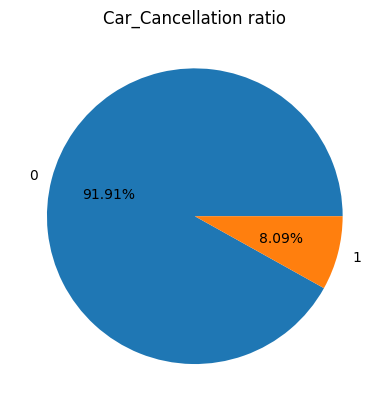

In [300]:
plt.pie(id_2["Car_Cancellation"].value_counts(normalize=True),labels=["0","1"],autopct="%1.2f%%")
plt.title("Car_Cancellation ratio")
plt.show()

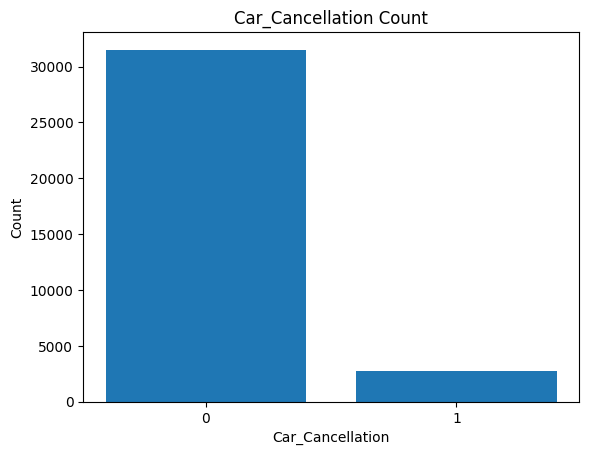

In [301]:
import matplotlib.pyplot as plt

value_counts = id_2["Car_Cancellation"].value_counts()

plt.bar(value_counts.index, value_counts.values)

plt.xlabel("Car_Cancellation")
plt.ylabel("Count")
plt.title("Car_Cancellation Count")

plt.xticks([0, 1])

plt.show()

In [302]:
id_2['Car_Cancellation'].value_counts()

0    31517
1     2775
Name: Car_Cancellation, dtype: int64

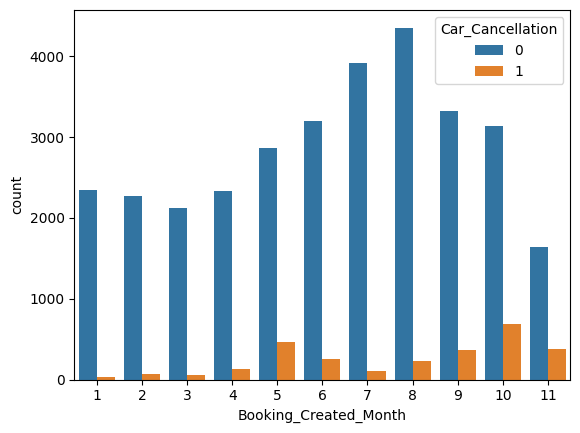

In [303]:
sns.countplot(x="Booking_Created_Month",data=id_2,hue="Car_Cancellation")
plt.show()

In [304]:
x2=id_2.drop('Car_Cancellation',axis=1)
y2=id_2['Car_Cancellation']

In [305]:
num2 = x2.select_dtypes(include='number')
char2 = x2.select_dtypes(include='object')

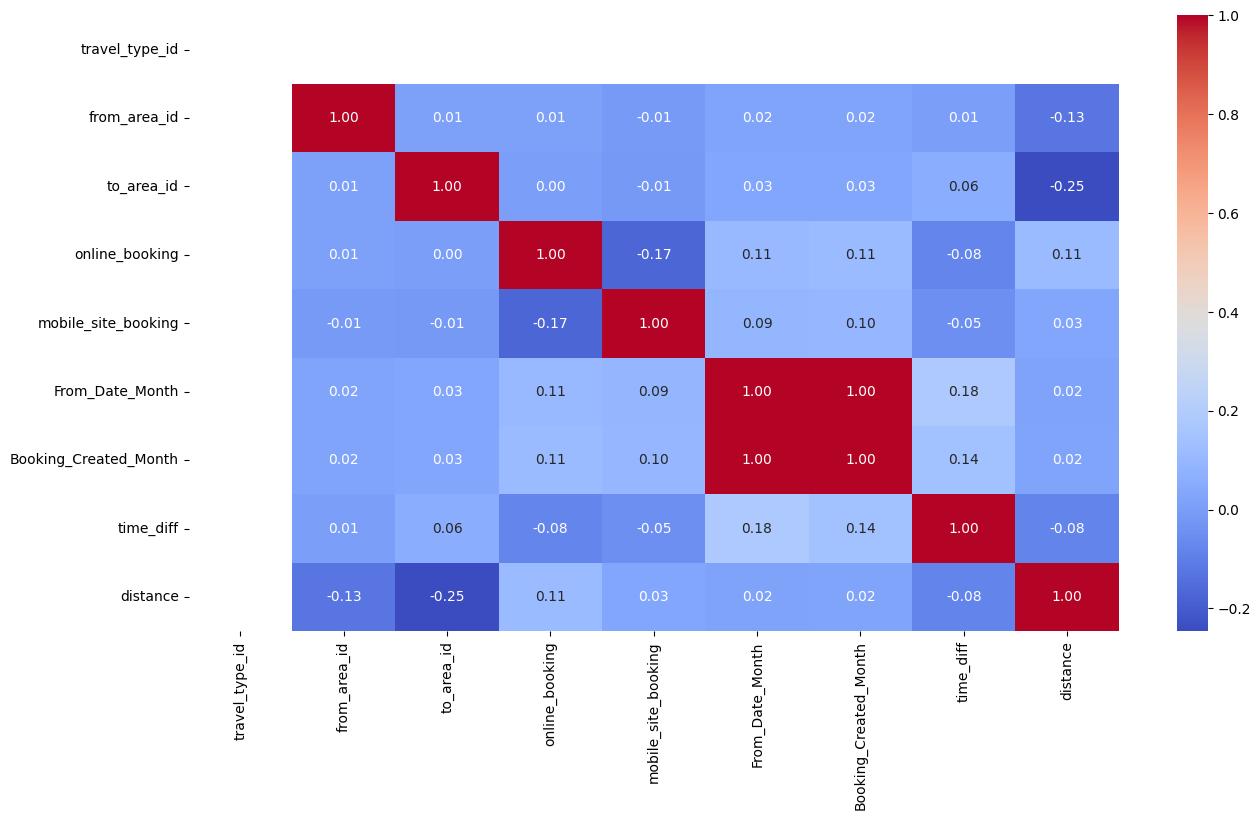

In [306]:
corr_matrix = num2.corr()

plt.figure(figsize=(15, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

In [307]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_columns = ['travel_type_id', 'from_area_id', 'to_area_id', 'online_booking',
       'mobile_site_booking', 'From_Date_Month', 'Booking_Created_Month',
       'time_diff', 'distance']
X = num2[selected_columns]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Variable         VIF
0         travel_type_id   16.515173
1           from_area_id    1.018031
2             to_area_id    1.069027
3         online_booking    1.075261
4    mobile_site_booking    1.054081
5        From_Date_Month  187.678847
6  Booking_Created_Month  185.387743
7              time_diff    1.348362
8               distance    1.104692


In [308]:
x2.drop(['From_Date_Month'],axis = 1, inplace = True)

In [309]:
x2.drop(['from_area_id','to_area_id'],axis = 1, inplace = True)

# Encoding Catagorical Veriable

In [310]:
x_char_dum2 = pd.get_dummies(char2, drop_first = True)

In [311]:
x_char_dum2.shape

(34292, 24)

In [312]:
x_char_dum2.head()

,From_Date_Day_Monday,From_Date_Day_Saturday,From_Date_Day_Sunday,From_Date_Day_Thursday,From_Date_Day_Tuesday,From_Date_Day_Wednesday,Booking_Created_Day_Monday,Booking_Created_Day_Saturday,Booking_Created_Day_Sunday,Booking_Created_Day_Thursday,Booking_Created_Day_Tuesday,Booking_Created_Day_Wednesday,from_day_Season_Spring,from_day_Season_Summer,from_day_Season_Winter,booking_Season_Spring,booking_Season_Summer,booking_Season_Winter,from_TOD_Evening,from_TOD_Late Night,from_TOD_Morning,booking_TOD_Evening,booking_TOD_Late Night,booking_TOD_Morning
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1


In [313]:
df_tt2 = pd.concat([num2,x_char_dum2],axis=1,join='inner')

In [314]:
df_tt2.head()

,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,From_Date_Month,Booking_Created_Month,time_diff,distance,From_Date_Day_Monday,From_Date_Day_Saturday,From_Date_Day_Sunday,From_Date_Day_Thursday,From_Date_Day_Tuesday,From_Date_Day_Wednesday,Booking_Created_Day_Monday,Booking_Created_Day_Saturday,Booking_Created_Day_Sunday,Booking_Created_Day_Thursday,Booking_Created_Day_Tuesday,Booking_Created_Day_Wednesday,from_day_Season_Spring,from_day_Season_Summer,from_day_Season_Winter,booking_Season_Spring,booking_Season_Summer,booking_Season_Winter,from_TOD_Evening,from_TOD_Late Night,from_TOD_Morning,booking_TOD_Evening,booking_TOD_Late Night,booking_TOD_Morning
0,2,83.0,448.0,0,0,1,1,21.0,3.980687,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
1,2,1010.0,540.0,0,0,1,1,395.0,14.004432,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
2,2,1301.0,1034.0,0,0,1,1,22.0,12.648909,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
3,2,768.0,398.0,0,0,1,1,66.0,9.534596,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,2,1365.0,849.0,0,0,1,1,67.0,14.655467,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1


# Feature Scaling

In [315]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled2 = scale.fit_transform(df_tt2)
X_scaled2 = pd.DataFrame(X_scaled2, columns=df_tt2.columns)
X_scaled2.head()

,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,From_Date_Month,Booking_Created_Month,time_diff,distance,From_Date_Day_Monday,From_Date_Day_Saturday,From_Date_Day_Sunday,From_Date_Day_Thursday,From_Date_Day_Tuesday,From_Date_Day_Wednesday,Booking_Created_Day_Monday,Booking_Created_Day_Saturday,Booking_Created_Day_Sunday,Booking_Created_Day_Thursday,Booking_Created_Day_Tuesday,Booking_Created_Day_Wednesday,from_day_Season_Spring,from_day_Season_Summer,from_day_Season_Winter,booking_Season_Spring,booking_Season_Summer,booking_Season_Winter,from_TOD_Evening,from_TOD_Late Night,from_TOD_Morning,booking_TOD_Evening,booking_TOD_Late Night,booking_TOD_Morning
0,0.0,0.057816,0.318344,0.0,0.0,0.0,0.0,0.012048,0.066859,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.719486,0.384011,0.0,0.0,0.0,0.0,0.015278,0.235216,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.927195,0.736617,0.0,0.0,0.0,0.0,0.012057,0.212449,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.546752,0.282655,0.0,0.0,0.0,0.0,0.012437,0.160142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.972877,0.604568,0.0,0.0,0.0,0.0,0.012445,0.246151,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [316]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_scaled2,y2,test_size=0.3,random_state= 254)

In [317]:
# Decison Tree
dt=DecisionTreeClassifier()
# Random Forest
rfc=RandomForestClassifier()
# Bagging Classifier
bg=BaggingClassifier()
# SVC
svc=SVC()

In [318]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_recall_fscore_support

for model in[rfc,bg,svc,dt]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc=model.fit(X_train2,Y_train2)
    y_pred2=abc.predict(X_test2)
    cm=confusion_matrix(Y_test2,y_pred2)
    AS=accuracy_score(Y_test2,y_pred2)
    CR=classification_report(Y_test2,y_pred2)
    ROC=roc_auc_score(Y_test2,y_pred2)
    PRFS=precision_recall_fscore_support(Y_test2,y_pred2, average='macro')
        
    # print of metrics
    print("confusion matrix \n",cm) 
    print("======="*3)
    print("Accuracy \n",AS) 
    print("======="*3)
    print("Classification Report \n",CR) 
    print("======="*3)
    print("ROC_AUC \n",ROC) 
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS)

Performance of RandomForestClassifier()
confusion matrix 
 [[9326   81]
 [ 684  197]]
Accuracy 
 0.9256415241057543
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      9407
           1       0.71      0.22      0.34       881

    accuracy                           0.93     10288
   macro avg       0.82      0.61      0.65     10288
weighted avg       0.91      0.93      0.91     10288

ROC_AUC 
 0.6074994627494414
MACRO Precision_recall_F1 
 (0.8201507125967558, 0.6074994627494414, 0.6502748829857117, None)
Performance of BaggingClassifier()
confusion matrix 
 [[9265  142]
 [ 672  209]]
Accuracy 
 0.9208786936236392
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      9407
           1       0.60      0.24      0.34       881

    accuracy                           0.92     10288
   macro avg       0.76      0.61      0.65     10288
we

In [319]:
# Balancing the dataset
# We should balance only the training dataset

from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

In [320]:
over=RandomOverSampler()
under=RandomUnderSampler()

In [321]:
X_train_over2,Y_train_over2=over.fit_resample(X_train2,Y_train2)
X_train_under2,Y_train_under2=under.fit_resample(X_train2,Y_train2)

In [322]:
for model in[rfc,bg,svc,dt]:
    print("======="*8)
    print("AFTER data-Balancing Performance:-",model)
    print("======="*8)
    for balancer in[over,under]:
        X_train2, Y_train2 = balancer.fit_resample(X_train2, Y_train2)
        abc=model.fit(X_train2,Y_train2)
        y_pred3=abc.predict(X_test2)
        cm=confusion_matrix(Y_test2,y_pred3)
        AS=accuracy_score(Y_test2,y_pred3)
        CR=classification_report(Y_test2,y_pred3)
        #ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test2,y_pred3, average='macro')
      
        print(model,"using technique:- ",balancer)
        #print("======="*6) 
        print("======="*8) 
        # print of metrics
        print("confusion matrix \n",cm) 
        print("======="*3)
        print("Accuracy \n",AS) 
        print("======="*3)
        print("Classification Report \n",CR) 
        print("======="*3)
        #print("ROC_AUC \n",ROC) 
        #print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS)
        print("======="*8)
        print("Conclude one balaning method")
        print("======="*8)
        
        print("======="*8)

AFTER data-Balancing Performance:- RandomForestClassifier()
RandomForestClassifier() using technique:-  RandomOverSampler()
confusion matrix 
 [[9221  186]
 [ 604  277]]
Accuracy 
 0.9232115085536547
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      9407
           1       0.60      0.31      0.41       881

    accuracy                           0.92     10288
   macro avg       0.77      0.65      0.69     10288
weighted avg       0.91      0.92      0.91     10288

MACRO Precision_recall_F1 
 (0.7683981556284658, 0.6473214635851512, 0.6855625049520641, None)
Conclude one balaning method
RandomForestClassifier() using technique:-  RandomUnderSampler()
confusion matrix 
 [[9233  174]
 [ 600  281]]
Accuracy 
 0.9247667185069984
Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      9407
           1       0.62      0.32      0.42       8

#  Hyperparameter Tuning - Imbalanced Dataset

In [323]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [324]:
param_grid={'max_depth':[2,5,7,10,13,15,17,20],'criterion':['gini','entropy'],
           'max_leaf_nodes':[5,10,15,20,25,30],'min_samples_split':[10,20,30,40,50]}

dt2=DecisionTreeClassifier(random_state=254)
grid=GridSearchCV(dt2,param_grid,cv=10)
grid.fit(X_train2,Y_train2)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 30,
 'min_samples_split': 10}

In [325]:
classifier2=DecisionTreeClassifier(random_state=245, max_depth=10,
                                   criterion='gini',max_leaf_nodes=30,
                                  min_samples_split=10)

dt2=classifier1.fit(X_train2,Y_train2)
Y_pred2=classifier1.predict(X_test2)
Y_pred_train2=classifier1.predict(X_train2)

print(classification_report(Y_test2,Y_pred2))
print(classification_report(Y_train2,Y_pred_train2))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      9407
           1       0.22      0.51      0.31       881

    accuracy                           0.81     10288
   macro avg       0.59      0.67      0.60     10288
weighted avg       0.89      0.81      0.84     10288

              precision    recall  f1-score   support

           0       0.63      0.83      0.72     22110
           1       0.75      0.51      0.61     22110

    accuracy                           0.67     44220
   macro avg       0.69      0.67      0.66     44220
weighted avg       0.69      0.67      0.66     44220



# Travel Id 3

In [326]:
id_3.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,From_Date_Day,From_Date_Month,Booking_Created_Day,Booking_Created_Month,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
8,2.0,3,448.0,NaN,NaN,NaN,0,0,12.927320,77.635750,NaN,NaN,0,Tuesday,1,Tuesday,1,Winter,Winter,Evening,Morning,376.0
20,2.0,3,471.0,NaN,NaN,NaN,0,0,13.018540,77.635240,NaN,NaN,0,Tuesday,1,Tuesday,1,Winter,Winter,Afternoon,Afternoon,98.0
23,1.0,3,1286.0,NaN,NaN,NaN,0,0,12.973448,77.620320,NaN,NaN,0,Tuesday,1,Tuesday,1,Winter,Winter,Evening,Afternoon,111.0
34,1.0,3,1323.0,NaN,NaN,NaN,1,0,12.869805,77.653211,NaN,NaN,0,Tuesday,1,Tuesday,1,Winter,Winter,Evening,Evening,155.0
47,2.0,3,142.0,NaN,NaN,NaN,0,0,12.912810,77.609230,NaN,NaN,0,Wednesday,1,Tuesday,1,Winter,Winter,Late Night,Evening,443.0


In [327]:
id_3.shape

(7550, 22)

In [328]:
id_3['package_id'].value_counts()

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

In [329]:
id_3['from_lat'].value_counts()

12.951850    335
12.849482    260
13.199560    226
12.966910    192
12.924150    192
12.889630    136
12.965190    119
12.912810    111
13.110840    110
13.022390    101
12.974400     86
12.992870     84
12.976770     81
12.845653     74
12.953434     72
12.959979     69
12.892657     69
13.028530     68
12.978960     68
12.897240     67
12.918730     67
13.030170     66
12.990947     63
13.051210     62
12.954310     62
12.989990     60
12.902450     58
12.995170     56
13.000370     55
12.927680     55
13.015080     53
12.956410     52
13.017660     52
12.919199     52
12.920730     51
13.044009     50
13.030640     50
12.933400     49
12.927320     49
12.907487     48
13.024340     48
12.984790     47
12.976720     47
12.907960     46
13.104820     46
12.871530     46
12.962980     45
12.934477     44
13.033690     43
12.912200     42
12.999874     42
12.926450     42
12.901840     42
12.934634     41
12.969368     41
12.934446     40
12.933310     40
12.930220     39
12.858833     

In [330]:
id_3.drop(['to_area_id','from_city_id','to_city_id'],axis= 1, inplace = True)

In [331]:
(id_3['Car_Cancellation'].value_counts()/len(id_3))*100

0    95.549669
1     4.450331
Name: Car_Cancellation, dtype: float64

In [332]:
id_3.isna().sum()

package_id                  0
travel_type_id              0
from_area_id                0
online_booking              0
mobile_site_booking         0
from_lat                    0
from_long                   0
to_lat                   7550
to_long                  7550
Car_Cancellation            0
From_Date_Day               0
From_Date_Month             0
Booking_Created_Day         0
Booking_Created_Month       0
from_day_Season             0
booking_Season              0
from_TOD                    0
booking_TOD                 0
time_diff                   0
dtype: int64

In [333]:
id_3.drop(['from_area_id','package_id','to_lat','to_long'],axis= 1, inplace = True)

In [334]:
id_3.drop(['from_lat','from_long'],axis= 1, inplace = True)

In [335]:
id_3.head()

,travel_type_id,online_booking,mobile_site_booking,Car_Cancellation,From_Date_Day,From_Date_Month,Booking_Created_Day,Booking_Created_Month,from_day_Season,booking_Season,from_TOD,booking_TOD,time_diff
8,3,0,0,0,Tuesday,1,Tuesday,1,Winter,Winter,Evening,Morning,376.0
20,3,0,0,0,Tuesday,1,Tuesday,1,Winter,Winter,Afternoon,Afternoon,98.0
23,3,0,0,0,Tuesday,1,Tuesday,1,Winter,Winter,Evening,Afternoon,111.0
34,3,1,0,0,Tuesday,1,Tuesday,1,Winter,Winter,Evening,Evening,155.0
47,3,0,0,0,Wednesday,1,Tuesday,1,Winter,Winter,Late Night,Evening,443.0


# data Visualization 

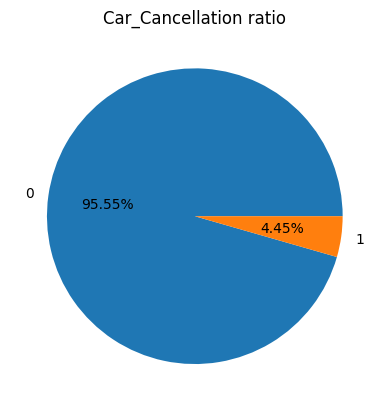

In [336]:
plt.pie(id_3["Car_Cancellation"].value_counts(normalize=True),labels=["0","1"],autopct="%1.2f%%")
plt.title("Car_Cancellation ratio")
plt.show()

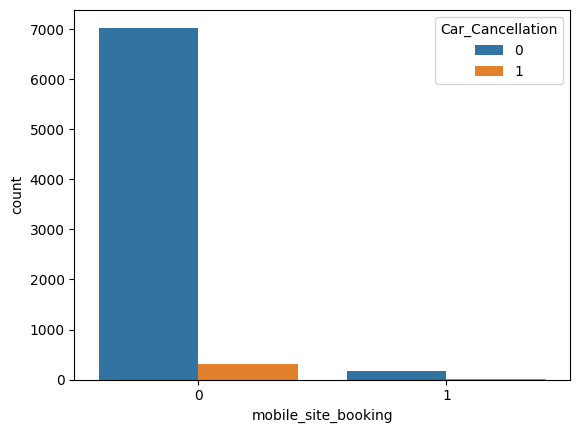

In [337]:
sns.countplot(x="mobile_site_booking",data=id_3,hue="Car_Cancellation")
plt.show()

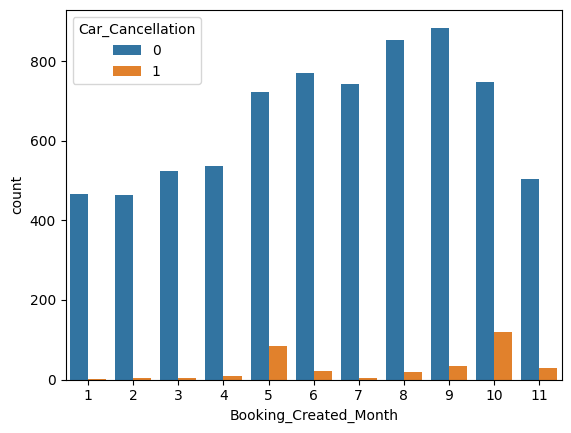

In [338]:
sns.countplot(x="Booking_Created_Month",data=id_3,hue="Car_Cancellation")
plt.show()

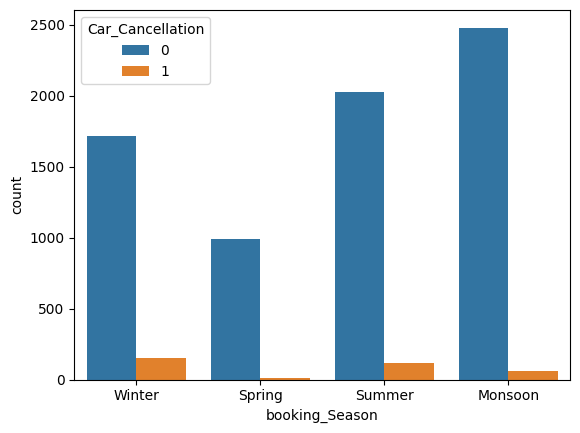

In [339]:
sns.countplot(x="booking_Season",data=id_3,hue="Car_Cancellation")
plt.show()

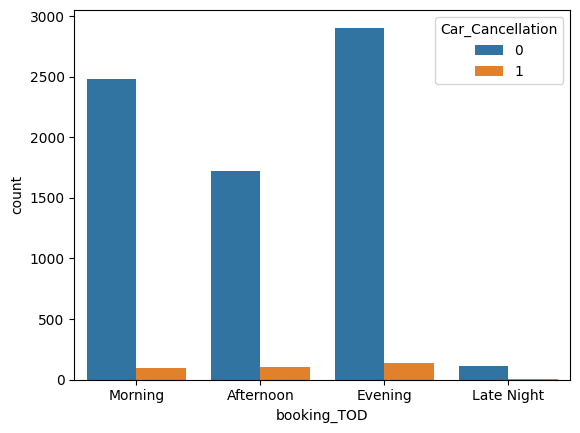

In [340]:
sns.countplot(x="booking_TOD",data=id_3,hue="Car_Cancellation")
plt.show()

In [341]:
num3.columns

Index(['travel_type_id', 'online_booking', 'mobile_site_booking',
       'Booking_Created_Month', 'time_diff'],
      dtype='object')

In [342]:
x3=id_3.drop('Car_Cancellation',axis=1)
y3=id_3['Car_Cancellation']

In [343]:
num3 = x3.select_dtypes(include='number')
char3 = x3.select_dtypes(include='object')

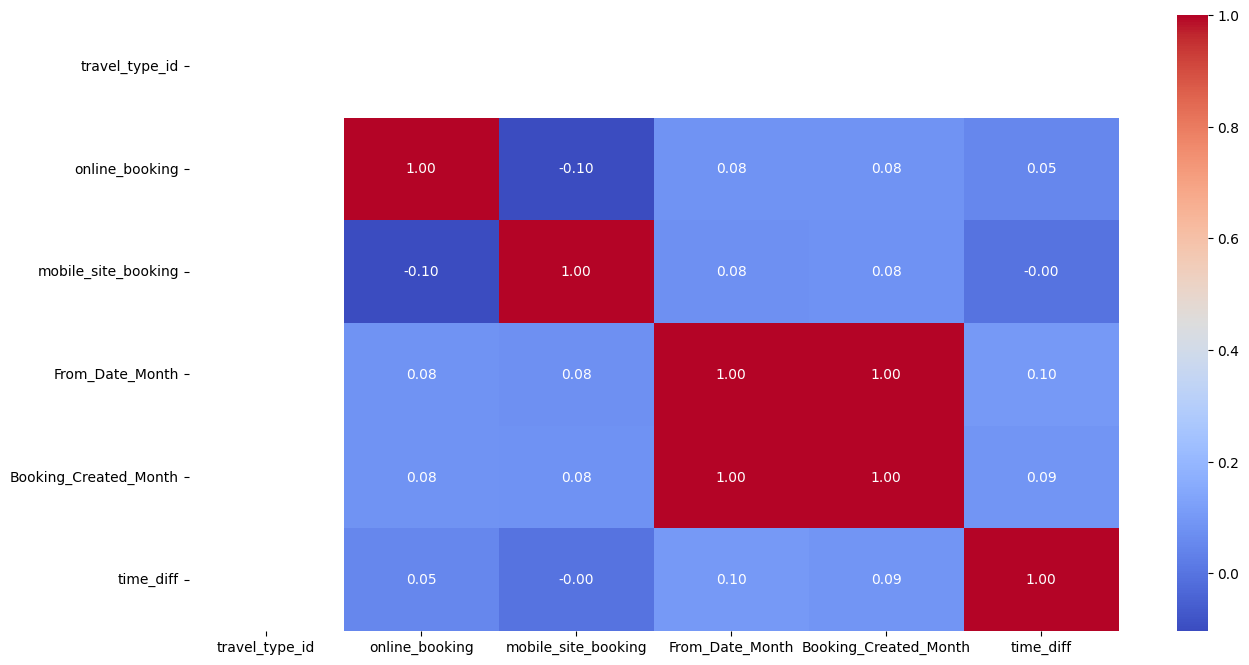

In [344]:
corr_matrix = num3.corr()

plt.figure(figsize=(15, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

In [345]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_columns = ['travel_type_id', 'online_booking', 'mobile_site_booking',
       'From_Date_Month', 'Booking_Created_Month', 'time_diff']
X = num3[selected_columns]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Variable         VIF
0         travel_type_id    6.135146
1         online_booking    1.021989
2    mobile_site_booking    1.018532
3        From_Date_Month  453.461558
4  Booking_Created_Month  452.015882
5              time_diff    1.127784


In [346]:
num3.drop(['From_Date_Month'],axis= 1, inplace = True)

In [347]:
# Encoding Catagorical Veriable

In [348]:
x_char_dum3 = pd.get_dummies(char3, drop_first = True)

In [349]:
df_tt3 = pd.concat([num3,x_char_dum3],axis=1,join='inner')

In [350]:
df_tt3.shape

(7550, 29)

# Feature Scaling

In [351]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled4 = scale.fit_transform(df_tt3)
X_scaled4 = pd.DataFrame(X_scaled4, columns=df_tt3.columns)
X_scaled4.shape

(7550, 29)

In [352]:
from sklearn.model_selection import train_test_split
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(X_scaled4,y3,test_size=0.25,random_state= 141)

In [353]:
# Decison Tree
dt3=DecisionTreeClassifier()
# Random Forest
rfc3=RandomForestClassifier()
# Bagging Classifier
bg3=BaggingClassifier()
# SVC
svc3=SVC()

In [354]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_recall_fscore_support

for model in[rfc3,bg3,svc3,dt3]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc=model.fit(X_train3,Y_train3)
    y_pred3=abc.predict(X_test3)
    cm=confusion_matrix(Y_test3,y_pred3)
    AS=accuracy_score(Y_test3,y_pred3)
    CR=classification_report(Y_test3,y_pred3)
    ROC=roc_auc_score(Y_test3,y_pred3)
    PRFS=precision_recall_fscore_support(Y_test3,y_pred3, average='macro')
        
    # print of metrics
    print("confusion matrix \n",cm) 
    print("======="*3)
    print("Accuracy \n",AS) 
    print("======="*3)
    print("Classification Report \n",CR) 
    print("======="*3)
    print("ROC_AUC \n",ROC) 
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS)

Performance of RandomForestClassifier()
confusion matrix 
 [[1773   25]
 [  75   15]]
Accuracy 
 0.9470338983050848
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1798
           1       0.38      0.17      0.23        90

    accuracy                           0.95      1888
   macro avg       0.67      0.58      0.60      1888
weighted avg       0.93      0.95      0.94      1888

ROC_AUC 
 0.5763811642565814
MACRO Precision_recall_F1 
 (0.6672077922077921, 0.5763811642565814, 0.6016709565804464, None)
Performance of BaggingClassifier()
confusion matrix 
 [[1768   30]
 [  70   20]]
Accuracy 
 0.9470338983050848
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1798
           1       0.40      0.22      0.29        90

    accuracy                           0.95      1888
   macro avg       0.68      0.60      0.63      1888
we

#  Hyperparameter Tuning - Imbalanced Dataset

In [355]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [356]:
param_grid={'max_depth':[2,5,7,10,13,15,17,20],'criterion':['gini','entropy'],
           'max_leaf_nodes':[5,10,15,20,25,30],'min_samples_split':[10,20,30,40,50]}

dt3=DecisionTreeClassifier(random_state=141)
grid=GridSearchCV(dt2,param_grid,cv=10)
grid.fit(X_train3,Y_train3)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 10,
 'min_samples_split': 10}

In [357]:
classifier3=DecisionTreeClassifier(random_state=141, max_depth=7,
                                   criterion='gini',max_leaf_nodes=10,
                                  min_samples_split=10)

dt3=classifier3.fit(X_train3,Y_train3)
Y_pred3=classifier3.predict(X_test3)
Y_pred_train3=classifier3.predict(X_train3)

print(classification_report(Y_test3,Y_pred3))
print(classification_report(Y_train3,Y_pred_train3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1798
           1       0.56      0.06      0.10        90

    accuracy                           0.95      1888
   macro avg       0.76      0.53      0.54      1888
weighted avg       0.94      0.95      0.93      1888

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5416
           1       0.74      0.08      0.15       246

    accuracy                           0.96      5662
   macro avg       0.85      0.54      0.56      5662
weighted avg       0.95      0.96      0.94      5662



# Balancing the dataset

In [358]:
# We should balance only the training dataset

from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

In [359]:
over=RandomOverSampler()
under=RandomUnderSampler()

In [360]:
X_train_over3,Y_train_over3=over.fit_resample(X_train3,Y_train3)
X_train_under3,Y_train_under3=under.fit_resample(X_train3,Y_train3)

In [361]:
for model in[rfc3,bg3,svc3,dt3]:
    print("======="*8)
    print("AFTER data-Balancing Performance:-",model)
    print("======="*8)
    for balancer in[over,under]:
        X_train3, Y_train3 = balancer.fit_resample(X_train3, Y_train3)
        abc=model.fit(X_train3,Y_train3)
        y_pred4=abc.predict(X_test3)
        cm=confusion_matrix(Y_test3,y_pred4)
        AS=accuracy_score(Y_test3,y_pred4)
        CR=classification_report(Y_test3,y_pred4)
        #ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test3,y_pred4, average='macro')
      
        print(model,"using technique:- ",balancer)
        #print("======="*6) 
        print("======="*8) 
        # print of metrics
        print("confusion matrix \n",cm) 
        print("======="*3)
        print("Accuracy \n",AS) 
        print("======="*3)
        print("Classification Report \n",CR) 
        print("======="*3)
        #print("ROC_AUC \n",ROC) 
        #print("======="*3)
        print("MACRO Precision_recall_F1 \n",PRFS)
        print("======="*8)
        print("Conclude one balaning method")
        print("======="*8)
        
        print("======="*8)

AFTER data-Balancing Performance:- RandomForestClassifier()
RandomForestClassifier() using technique:-  RandomOverSampler()
confusion matrix 
 [[1755   43]
 [  62   28]]
Accuracy 
 0.944385593220339
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1798
           1       0.39      0.31      0.35        90

    accuracy                           0.94      1888
   macro avg       0.68      0.64      0.66      1888
weighted avg       0.94      0.94      0.94      1888

MACRO Precision_recall_F1 
 (0.6801220088832389, 0.6435978247435422, 0.6593902219014973, None)
Conclude one balaning method
RandomForestClassifier() using technique:-  RandomUnderSampler()
confusion matrix 
 [[1754   44]
 [  66   24]]
Accuracy 
 0.9417372881355932
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1798
           1       0.35      0.27      0.30        9